* Check Diffusivity of the CTD casts.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

from salishsea_tools import tidetools, viz_tools,geo_tools
import seaborn as sns
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [3]:
paths = {'RFdaily': '/data/jieliu/MEOPAR/IOS/octRFdaily/',
         '1e-05': '/data/jieliu/MEOPAR/IOS/oct1e05/',
          '1e-051e-06':'/data/jieliu/MEOPAR/IOS/oct1e061e05/'}
grid_B = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/mesh_mask.nc')

X = grid_B.variables['nav_lon']
Y = grid_B.variables['nav_lat']
bathy = grid_B.variables['Bathymetry']
e1t = mesh.variables['e1t'][0]
e2t = mesh.variables['e2t'][0]

In [4]:
S={}
RF_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/octRFdaily/SalishSea_1d_20141001_20141030_grid_T.nc')
Di_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_T.nc')
Vi_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_T.nc')
S['RF'] = RF_T.variables['vosaline']
S['Di'] = Di_T.variables['vosaline']
S['Vi'] = Vi_T.variables['vosaline']
depth = Di_T.variables['deptht']
time_counter = Di_T.variables['time_counter']

In [5]:
U= {}
Di_U = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_U.nc')
Vi_U = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_U.nc')
U['Di'] = Di_U.variables['vozocrtx']
U['Vi'] = Vi_U.variables['vozocrtx']

In [6]:
V= {}
Di_V = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_V.nc')
Vi_V = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_V.nc')
V['Di'] = Di_V.variables['vomecrty']
V['Vi'] = Vi_V.variables['vomecrty']

# Method 1, plot the plume boundary

In [7]:
key = 'Di'
dep = 0
S_aveN = np.nanmean(S[key][:,dep,505:510,240:245],axis = 0) ## first temporal average of northern region
S_ref = np.nanmean(S_aveN) ## then spatial average
S_thre = 1.14*S_ref-4.8 ## threshold of plume
S_aveW = np.nanmean(S[key][:,dep],axis = 0) ## temporal averaged of the whole domain

lon = Vi_T.variables['nav_lon']
lat = Vi_T.variables['nav_lat']

* If the plume boundary is set by the corner of viscosity case, then

(48.5, 49.4)

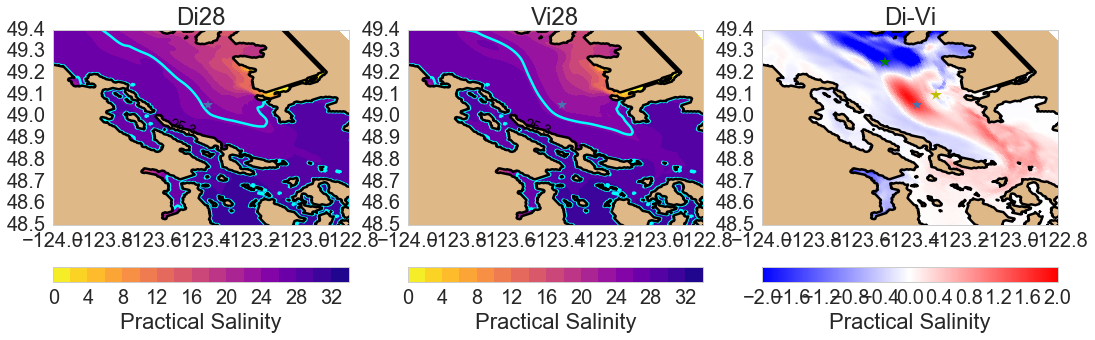

In [244]:
day = 27
fig,axs = plt.subplots(1,3,figsize = (18,5))
for ax, key in zip([axs[0],axs[1]],['Di','Vi']):
    mesh = ax.pcolormesh(X,Y,S[key][day,dep],label = key,cmap = 'plasma_r',vmin =0,vmax = 33)
    mesh = ax.contourf(lon[:],lat[:],S[key][day,dep],20,cmap='plasma_r')
    CS3 = ax.contour(lon[:],lat[:],S[key][day,dep], levels = [S_thre], colors='cyan',linewidths=(2.5))
    plt.clabel(CS3, fmt='%2.1f',inline=1,inline_spacing=-2,colors='k',fontsize = 14)
    ax.plot(-123.372667,49.054667,'*',markersize = 10)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
    cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
    cbar.set_label('Practical Salinity')
    ax.set_title(key+str(day+1))
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4]) 

ax = axs[-1]
mesh = ax.pcolormesh(X,Y,S['Di'][day,dep]-S['Vi'][day,dep],label = key,cmap = 'bwr',vmin =-2,vmax = 2)
ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
ax.plot(-123.372667,49.054667,'*',markersize = 10)
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
cbar.set_label('Practical Salinity')
ax.set_title('Di-Vi')
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.4])  

/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


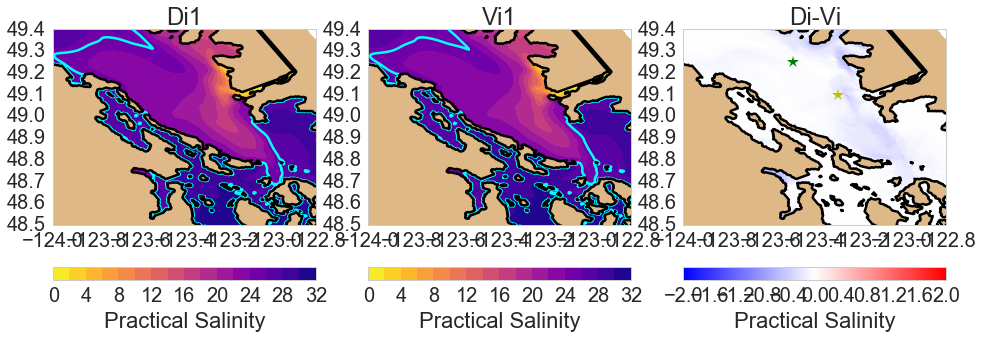

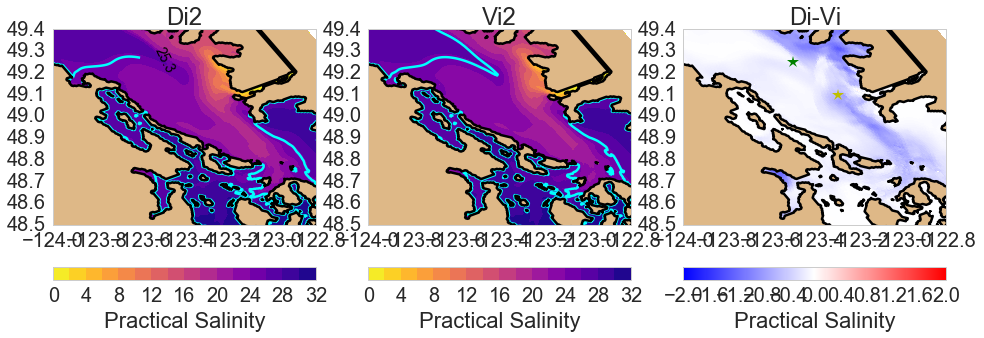

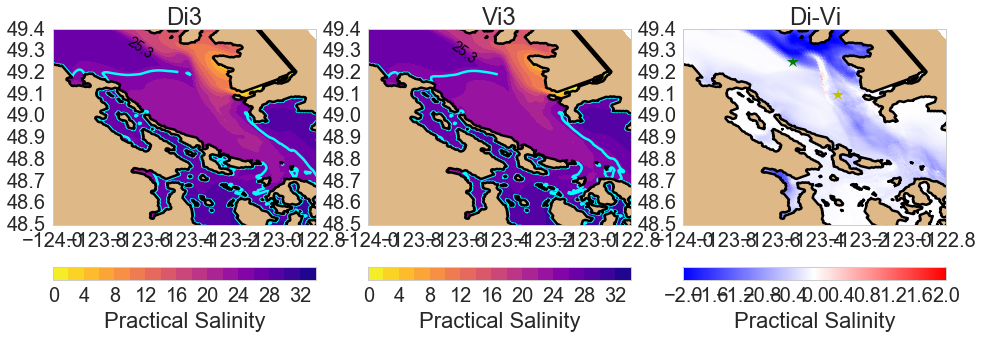

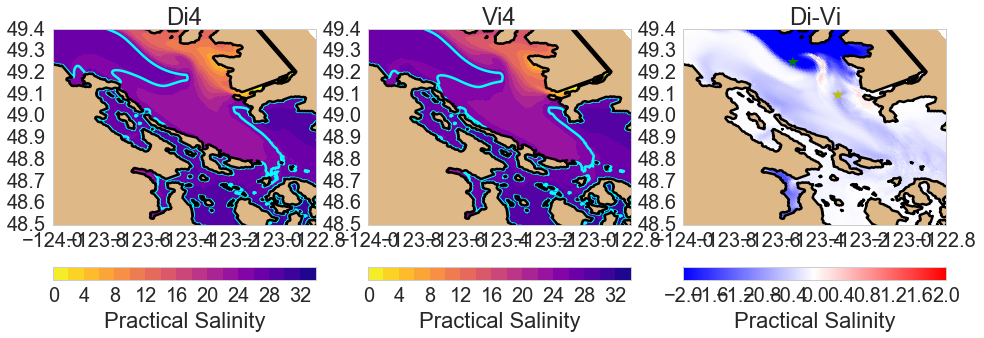

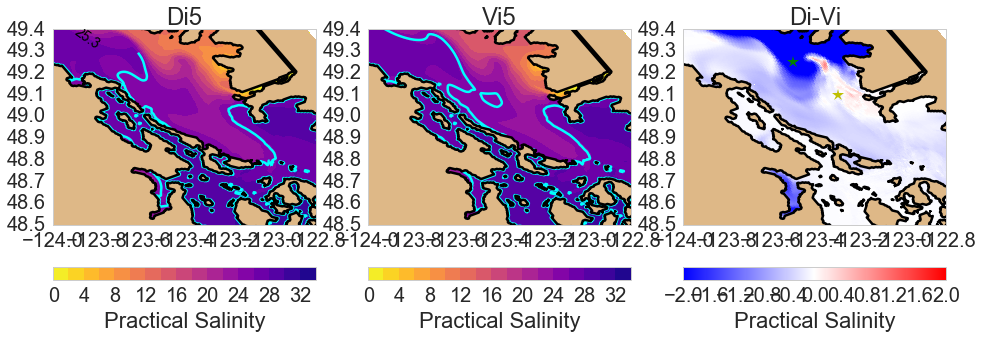

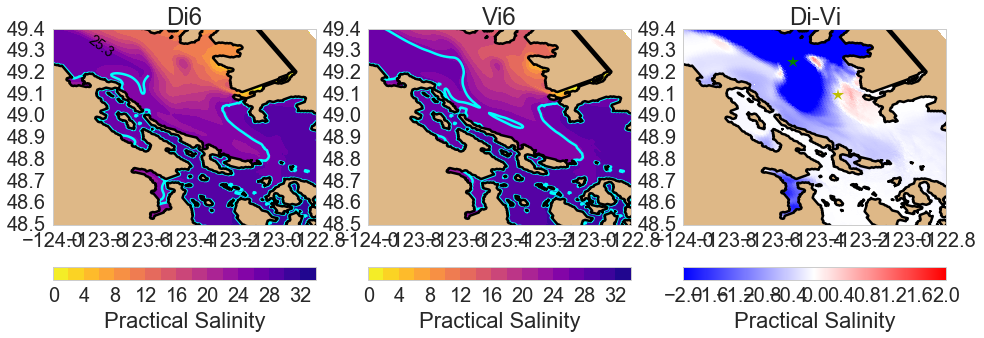

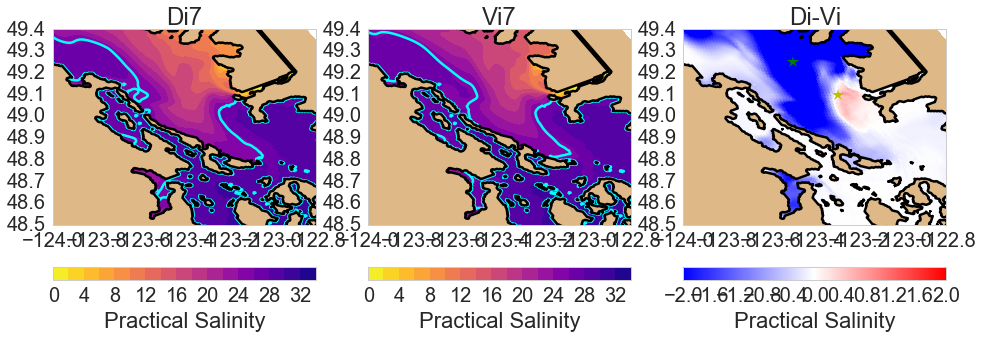

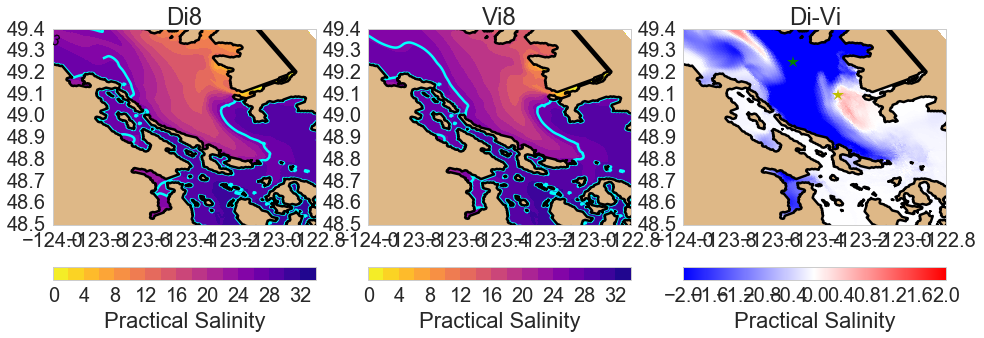

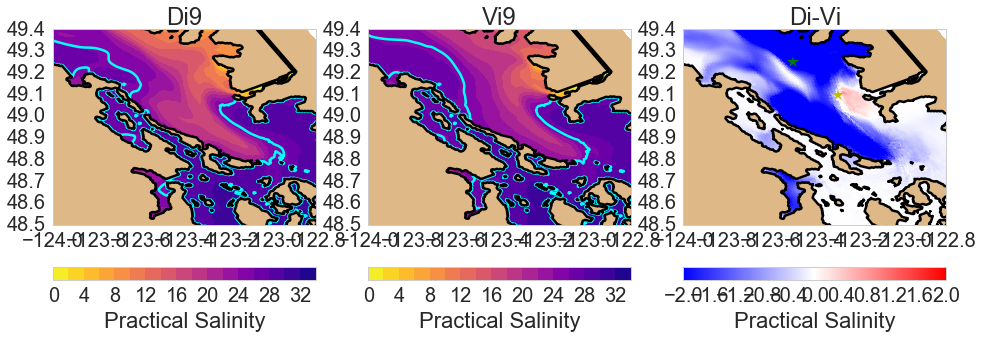

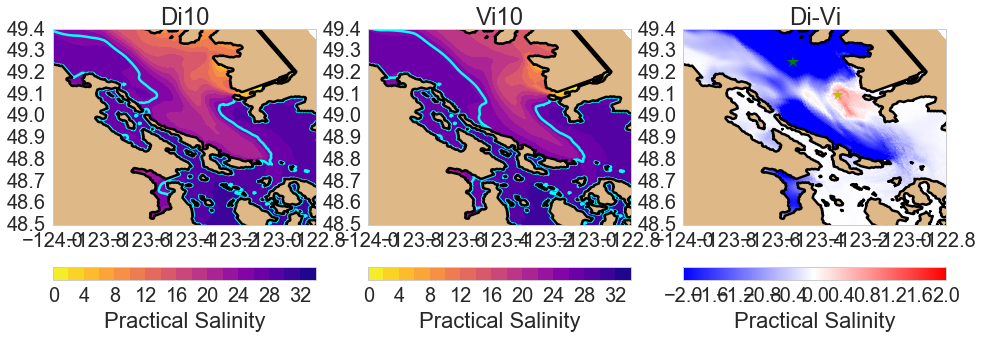

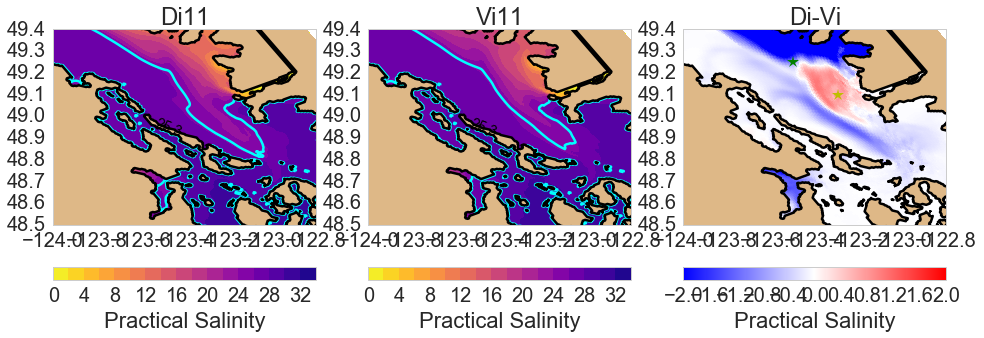

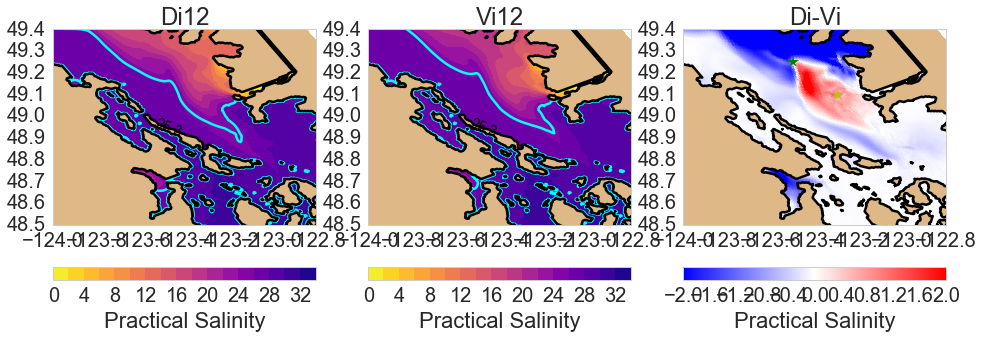

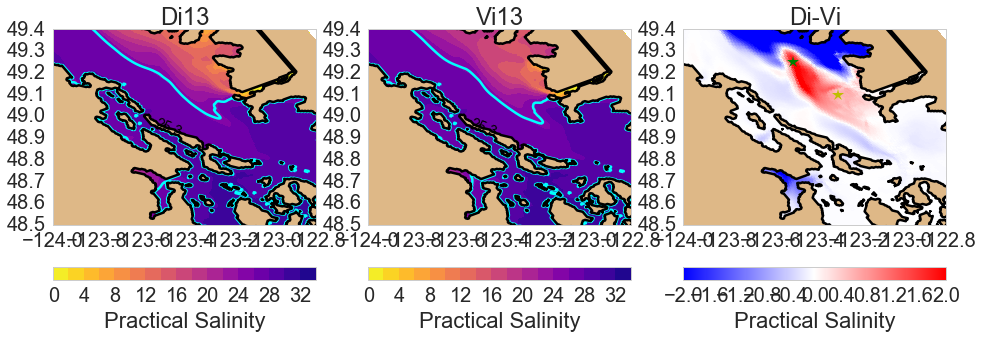

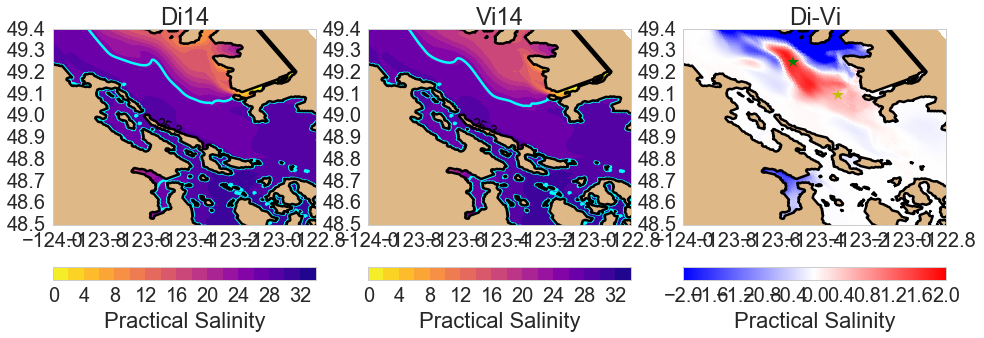

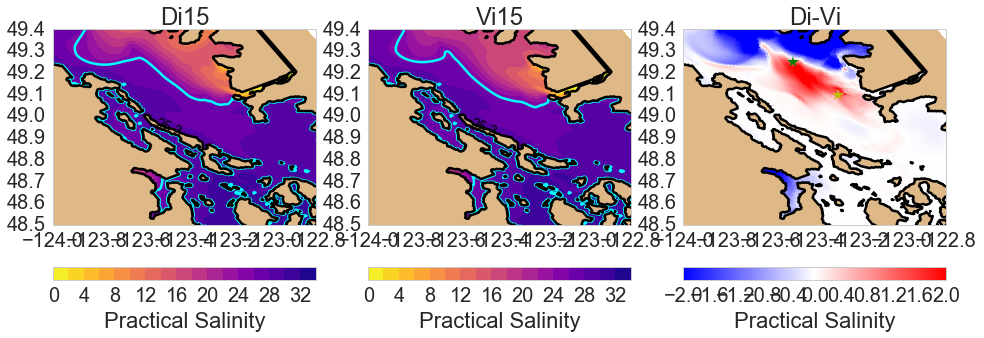

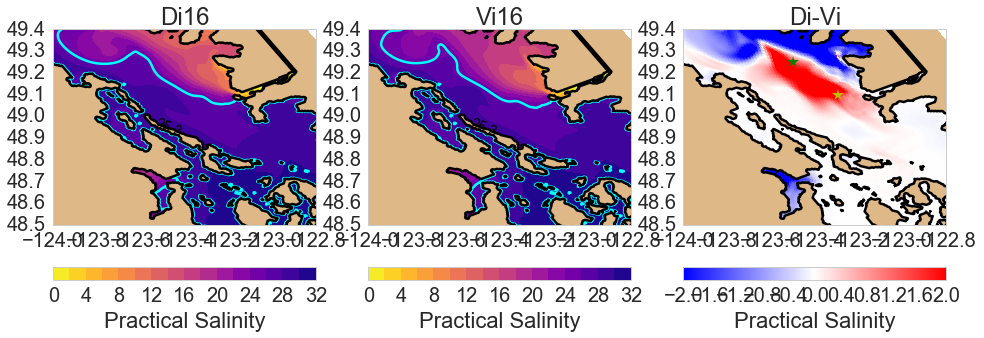

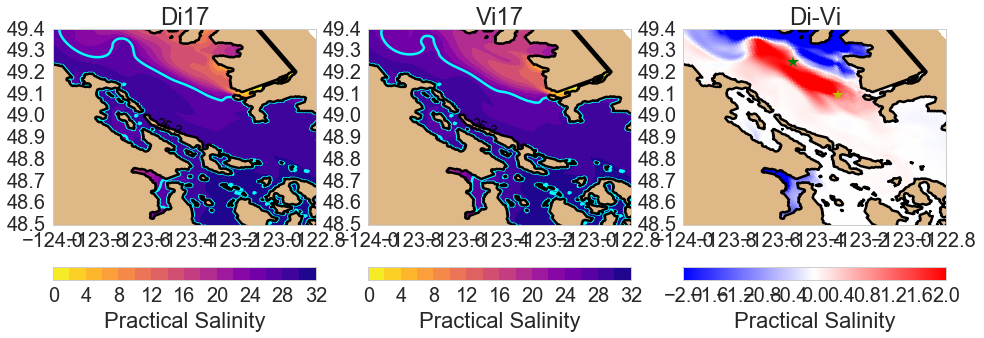

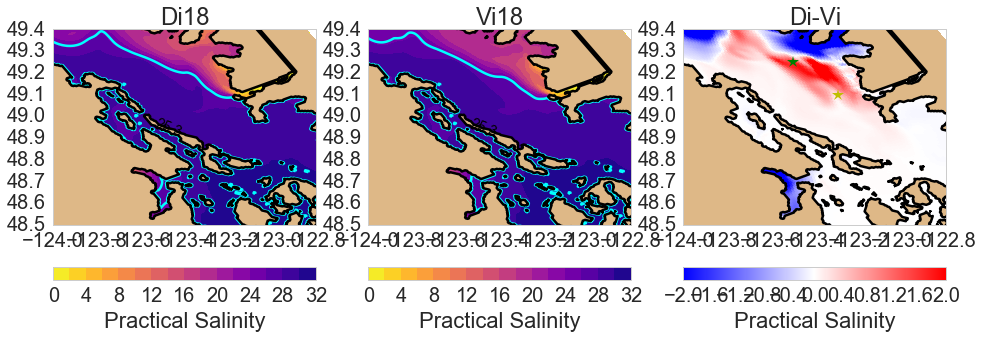

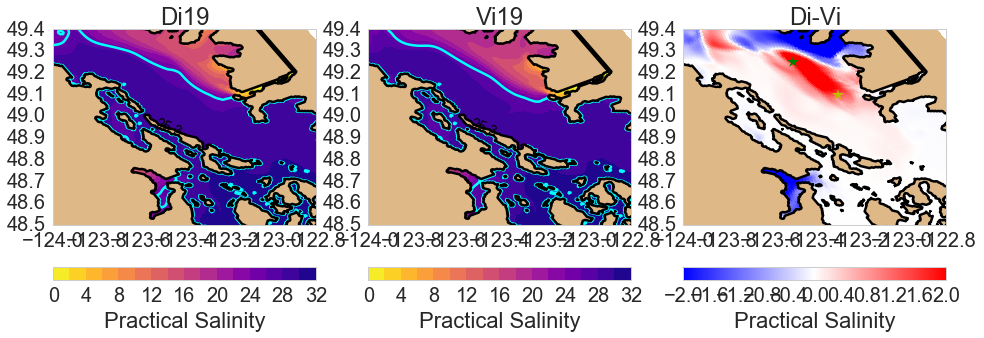

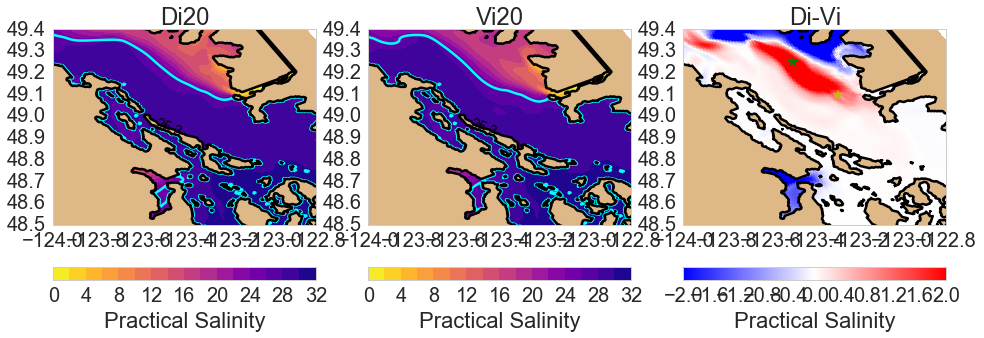

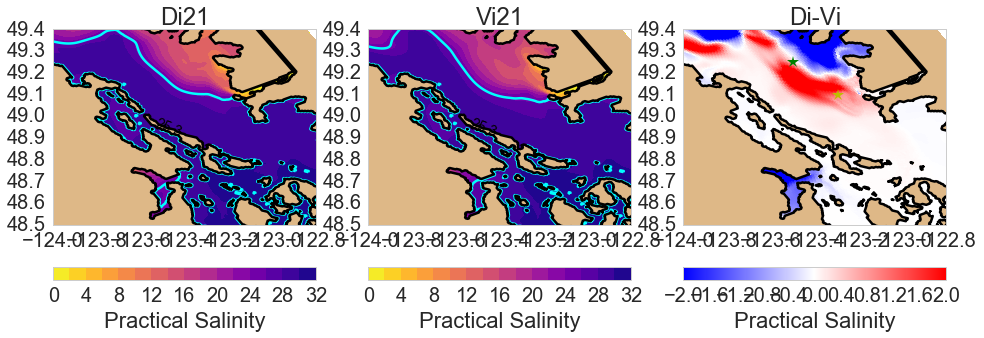

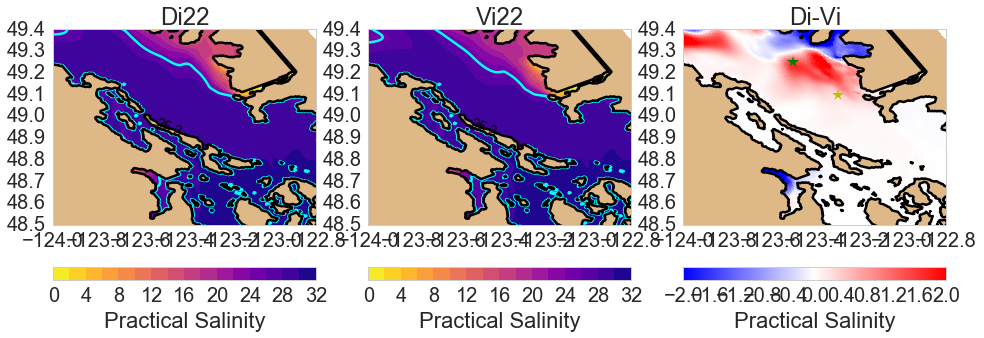

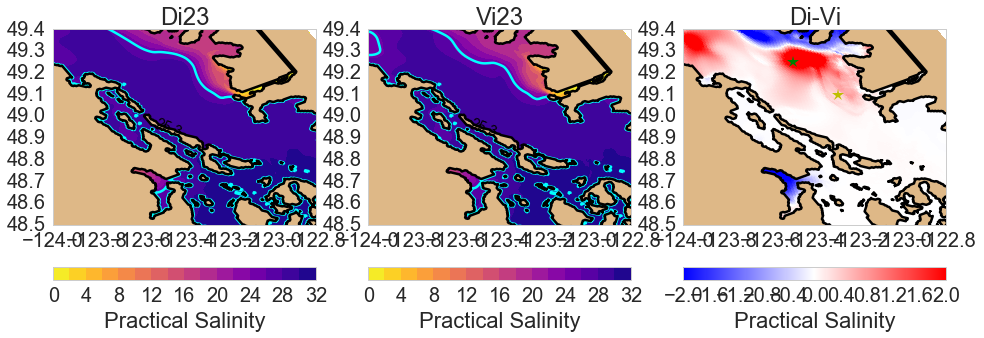

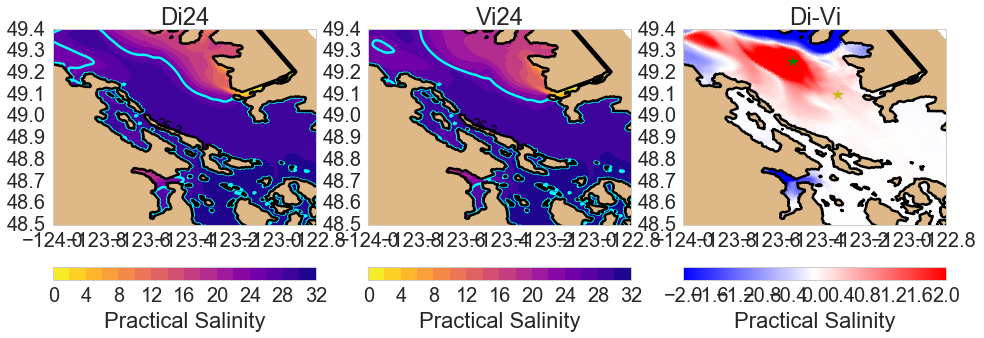

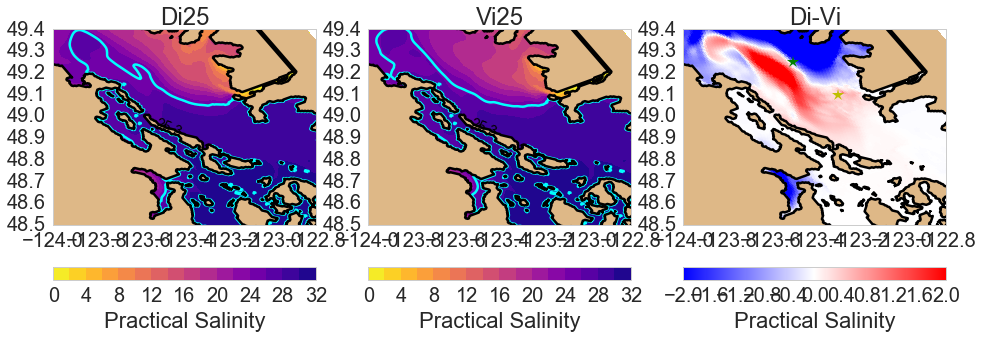

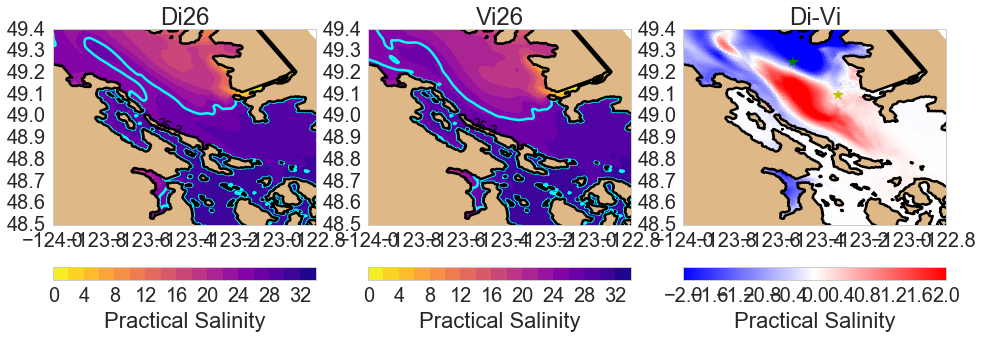

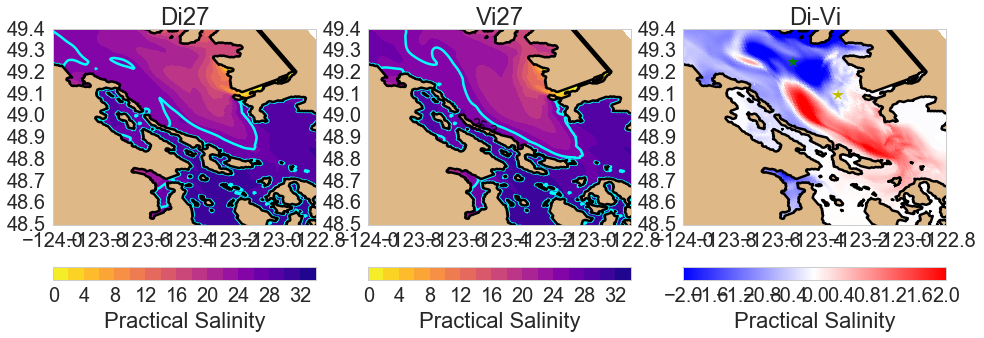

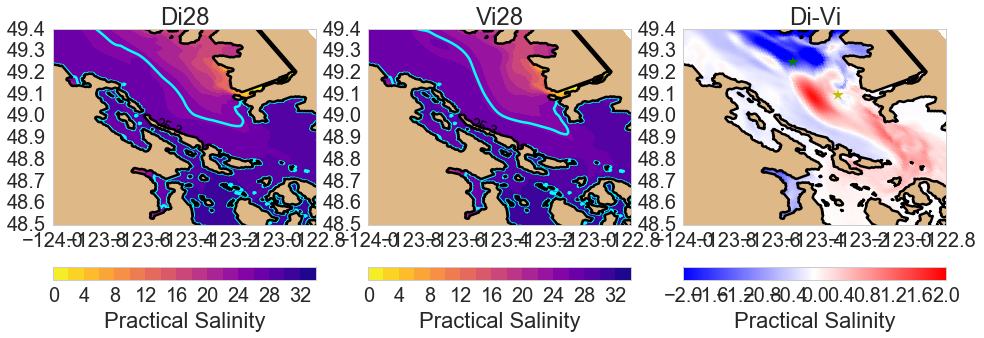

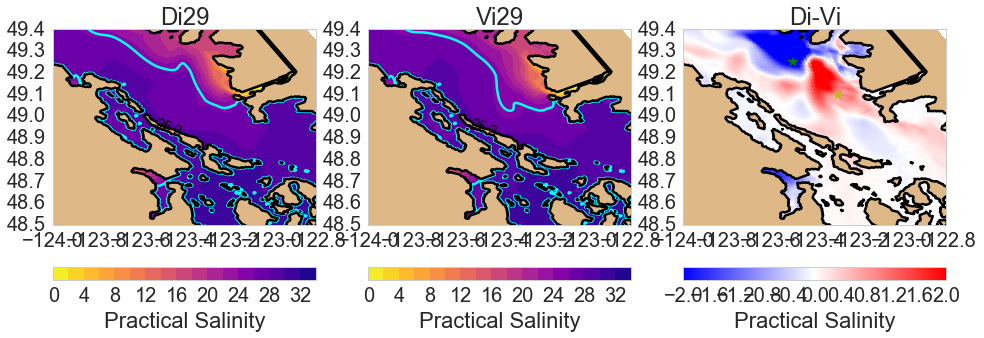

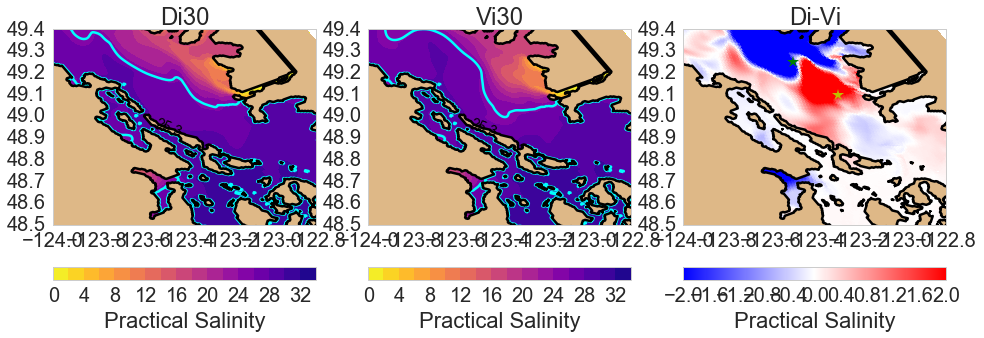

In [64]:
dep = 0
for day in range(30):
    fig,axs = plt.subplots(1,3,figsize = (16,5))
    for ax, key in zip([axs[0],axs[1]],['Di','Vi']):
        mesh = ax.pcolormesh(X,Y,S[key][day,dep],label = key,cmap = 'plasma_r',vmin =0,vmax = 33)
        mesh = ax.contourf(lon[:],lat[:],S[key][day,dep],20,cmap='plasma_r')
        CS3 = ax.contour(lon[:],lat[:],S[key][day,dep], levels = [S_thre], colors='cyan',linewidths=(2.5))
        plt.clabel(CS3, fmt='%2.1f',inline=1,inline_spacing=-2,colors='k',fontsize = 14)
        viz_tools.plot_coastline(ax,grid_B, coords='map')
        viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
        cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
        cbar.set_label('Practical Salinity')
        ax.set_title(key+str(day+1))
        ax.set_xlim([-124, -122.8])
        ax.set_ylim([48.5, 49.4]) 

    ax = axs[-1]
    mesh = ax.pcolormesh(X,Y,S['Di'][day,dep]-S['Vi'][day,dep],label = key,cmap = 'bwr',vmin =-2,vmax = 2)
    ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
    ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
    cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
    cbar.set_label('Practical Salinity')
    ax.set_title('Di-Vi')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])  

# Calculate averaged surface salinity over subdomain over time

(48.5, 49.5)

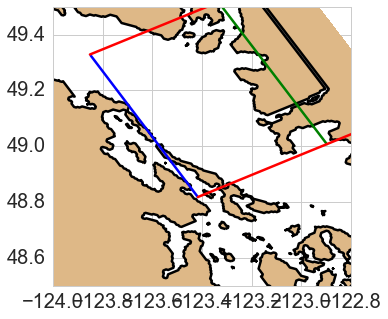

In [27]:
## my own subdomain
fig, ax = plt.subplots(1,1,figsize = (16/3,5))
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[380:380+130,240],Y[380:380+130,240],'b-')
ax.plot(X[380:380+130,240+100],Y[380:380+130,240+100],'g-')
ax.plot(X[380+130,240:240+157],Y[380+130,240:240+157],'r-')
ax.plot(X[380,240:240+157],Y[380,240:240+157],'r-')
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.5]) 

In [12]:
def salinity_xy(grid_T,tst,ted,yslices,xslices):
    """Calculate the salinity at the surface for all grid cells"""

    S = grid_T.variables['vosaline'][tst:ted+1,0,yslices[0]:yslices[-1],xslices[0]:xslices[-1]]
    S = np.ma.masked_values(S,0) ## mask land value
        
    return S

In [39]:
def integral_salinity(grid_T,tst,ted,dep,S,S_thre,yslices,xslices):
    """return salinity in the plume region"""
    integral_fresh = np.zeros(S.shape)
    for t in range(ted+1-tst):
        for jj in range(yslices[-1]-yslices[0]):
            for ii in range(xslices[-1]-xslices[0]):
                if S[t,jj,ii] - S_thre >= 0.:
                    integral_fresh[t,jj,ii] = np.nan
                elif  S[t,jj,ii] - S_thre < 0:
                    integral_fresh[t,jj,ii] = S[t,jj,ii]
    #integral_fresh = np.nansum(np.nansum(integral_fresh,axis = 1),axis = 1)

    return integral_fresh

In [33]:
yslices = [380,380+130]
xslices =  [240,240+157]
SS_Di= salinity_xy(Di_T,0,29,yslices,xslices)
SS_Vi= salinity_xy(Vi_T,0,29,yslices,xslices)

In [40]:
integral_SS_Di = integral_salinity(Di_T,0,29,0,SS_Di,25.3,yslices,xslices)
integral_SS_Vi = integral_salinity(Vi_T,0,29,0,SS_Vi,25.3,yslices,xslices)

In [44]:
print('Lower diffusivity - higher diffusivity in surface salinity is ',np.nanmean(integral_SS_Di-integral_SS_Vi))

Lower diffusivity - higher diffusivity in surface salinity is  -0.540542157913


# Method 2: Calcualte surace freshwater amount inside the plume domain

(48.5, 49.5)

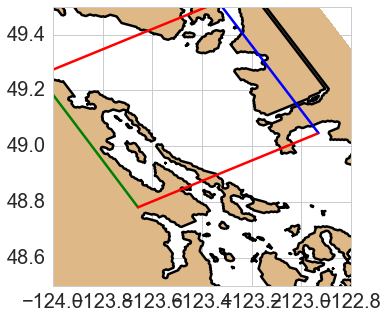

In [15]:
fig, ax = plt.subplots(1,1,figsize = (16/3,5))
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[390:511,340],Y[390:511,340],'b-')
ax.plot(X[390:511,200],Y[390:511,200],'g-')
ax.plot(X[390,200:340],Y[390,200:340],'r-')
ax.plot(X[510,200:340],Y[510,200:340],'r-')
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.5])  

In [16]:
def freshwater_xy(grid_T,tst,ted,yslices,xslices):
    """Calculate the freshwater at the surface for all grid cells"""
    S0 = 30;
    S = grid_T.variables['vosaline'][tst:ted+1,0,yslices[0]:yslices[-1],xslices[0]:xslices[-1]]
    S = np.ma.masked_values(S,0) ## mask land value
    fresh = np.zeros(S.shape)
    fresh = S0 - S
        
    return fresh,S

In [17]:
def integral_freshwater(grid_T,tst,ted,dep,S,S_thre,fresh,yslices,xslices):
    """S is S[key][:,dep,yslices[0]:yslices[-1],xslices[0]:xslices[-1]], 
    integral freshwater inside the plume boundary"""
    integral_fresh = np.zeros(S.shape)
    for t in range(ted+1-tst):
        for jj in range(yslices[-1]-yslices[0]):
            for ii in range(xslices[-1]-xslices[0]):
                if S[t,jj,ii] - S_thre >= 0.:
                    integral_fresh[t,jj,ii] = np.nan
                elif  S[t,jj,ii] - S_thre < 0:
                    integral_fresh[t,jj,ii] = fresh[t,jj,ii]*e1t[jj,ii]*e2t[jj,ii]
    integral_fresh = np.nansum(np.nansum(integral_fresh,axis = 1),axis = 1)

    return integral_fresh

In [18]:
yslices = [390,512]
xslices =  [200,341]
fresh_Di,SS_Di= freshwater_xy(Di_T,0,29,yslices,xslices)
fresh_Vi,SS_Vi= freshwater_xy(Vi_T,0,29,yslices,xslices)

In [20]:
integral_fresh_Di = integral_freshwater(Di_T,0,29,0,SS_Di,25.3,fresh_Di,yslices,xslices)
integral_fresh_Vi = integral_freshwater(Vi_T,0,29,0,SS_Vi,25.3,fresh_Vi,yslices,xslices)

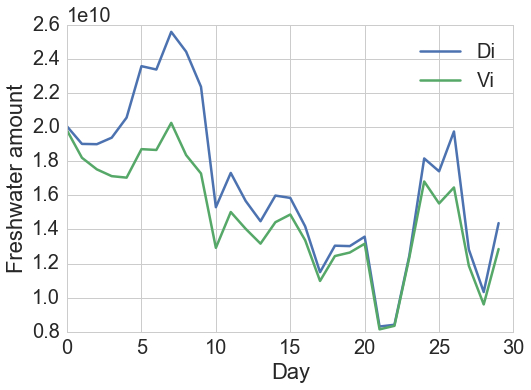

In [21]:
plt.plot(integral_fresh_Di,label ='Di')
plt.plot(integral_fresh_Vi,label ='Vi')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Freshwater amount')

In [22]:
np.sum(integral_fresh_Di) - np.sum(integral_fresh_Vi)

57316416311.241089

# Method 3: Calculate surface freshwater amount in the larger domain

(48.5, 49.5)

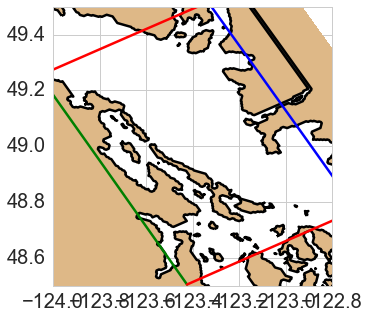

In [35]:
fig, ax = plt.subplots(1,1,figsize = (16/3,5))
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[320:511,340],Y[320:511,340],'b-')
ax.plot(X[320:511,200],Y[320:511,200],'g-')
ax.plot(X[320,200:340],Y[320,200:340],'r-')
ax.plot(X[510,200:340],Y[510,200:340],'r-')
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.5])  

In [58]:
def integral_freshwater_largerDomain(grid_T,tst,ted,dep,S,fresh,yslices,xslices):
    """S is S[key][:,dep,yslices[0]:yslices[-1],xslices[0]:xslices[-1]], 
    integral freshwater inside the region defined"""
    integral_fresh = np.zeros(S.shape)
    for t in range(ted+1-tst):
        for jj in range(yslices[-1]-yslices[0]):
            for ii in range(xslices[-1]-xslices[0]):
                if lon[jj+yslices[0],ii+xslices[0]] >= -124. and lon[jj+yslices[0],ii+xslices[0]] <= -122.8 \
                and lat[jj+yslices[0],ii+xslices[0]] >= 48.6 and lat[jj+yslices[0],ii+xslices[0]] <= 49.4:
                    integral_fresh[t,jj,ii] = fresh[t,jj,ii]*e1t[jj,ii]*e2t[jj,ii]
                else:    
                    integral_fresh[t,jj,ii] = np.nan
    integral_fresh = np.nansum(np.nansum(integral_fresh,axis = 1),axis = 1)

    return integral_fresh

In [36]:
yslices = [320,512]
xslices =  [200,341]
fresh_DiLarger,SS_DiLarger= freshwater_xy(Di_T,0,29,yslices,xslices)
fresh_ViLarger,SS_ViLarger= freshwater_xy(Vi_T,0,29,yslices,xslices)

In [59]:
integral_fresh_DiLarger = integral_freshwater_largerDomain(Di_T,0,29,0,SS_DiLarger,fresh_DiLarger,yslices,xslices)

/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [61]:
integral_fresh_ViLarger = integral_freshwater_largerDomain(Vi_T,0,29,0,SS_ViLarger,fresh_ViLarger,yslices,xslices)

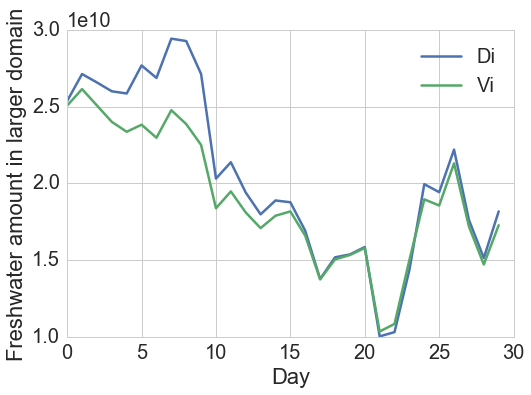

In [62]:
plt.plot(integral_fresh_DiLarger,label ='Di')
plt.plot(integral_fresh_ViLarger,label ='Vi')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Freshwater amount in larger domain')

In [63]:
np.sum(integral_fresh_DiLarger) - np.sum(integral_fresh_ViLarger)

40941243342.979736

# Vertical profiles

(48.5, 49.4)

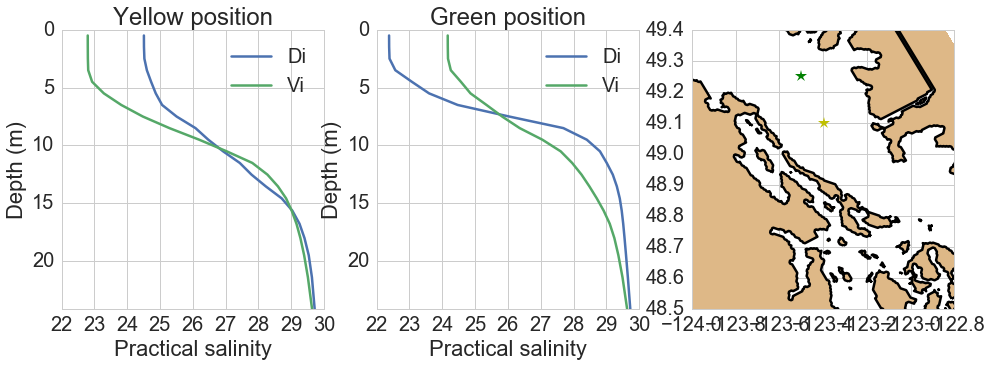

In [10]:
fig, axs = plt.subplots(1,3,figsize = (16,5))
ax = axs[0]
for key in ['Di','Vi']:
    ax.plot(S[key][27,0:30,433,278],depth[0:30],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Yellow position')
ax = axs[1]
for key in ['Di','Vi']:
    ax.plot(S[key][27,0:30,470,282],depth[0:30],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Green position')
for ax in [axs[0],axs[1]]:
    ax.set_ylim([depth[20],0])
    ax.set_xlim([22,30])
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Practical salinity')
    
ax = axs[2]
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[433,278],Y[433,278],'y*',markersize = 12)
ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.4]) 

In [31]:
BATHY,X,Y = tidetools.get_SS2_bathy_data()
geo_tools.find_closest_model_point(-123.372667,49.054667,X,Y,land_mask=BATHY.mask)

(423, 276)

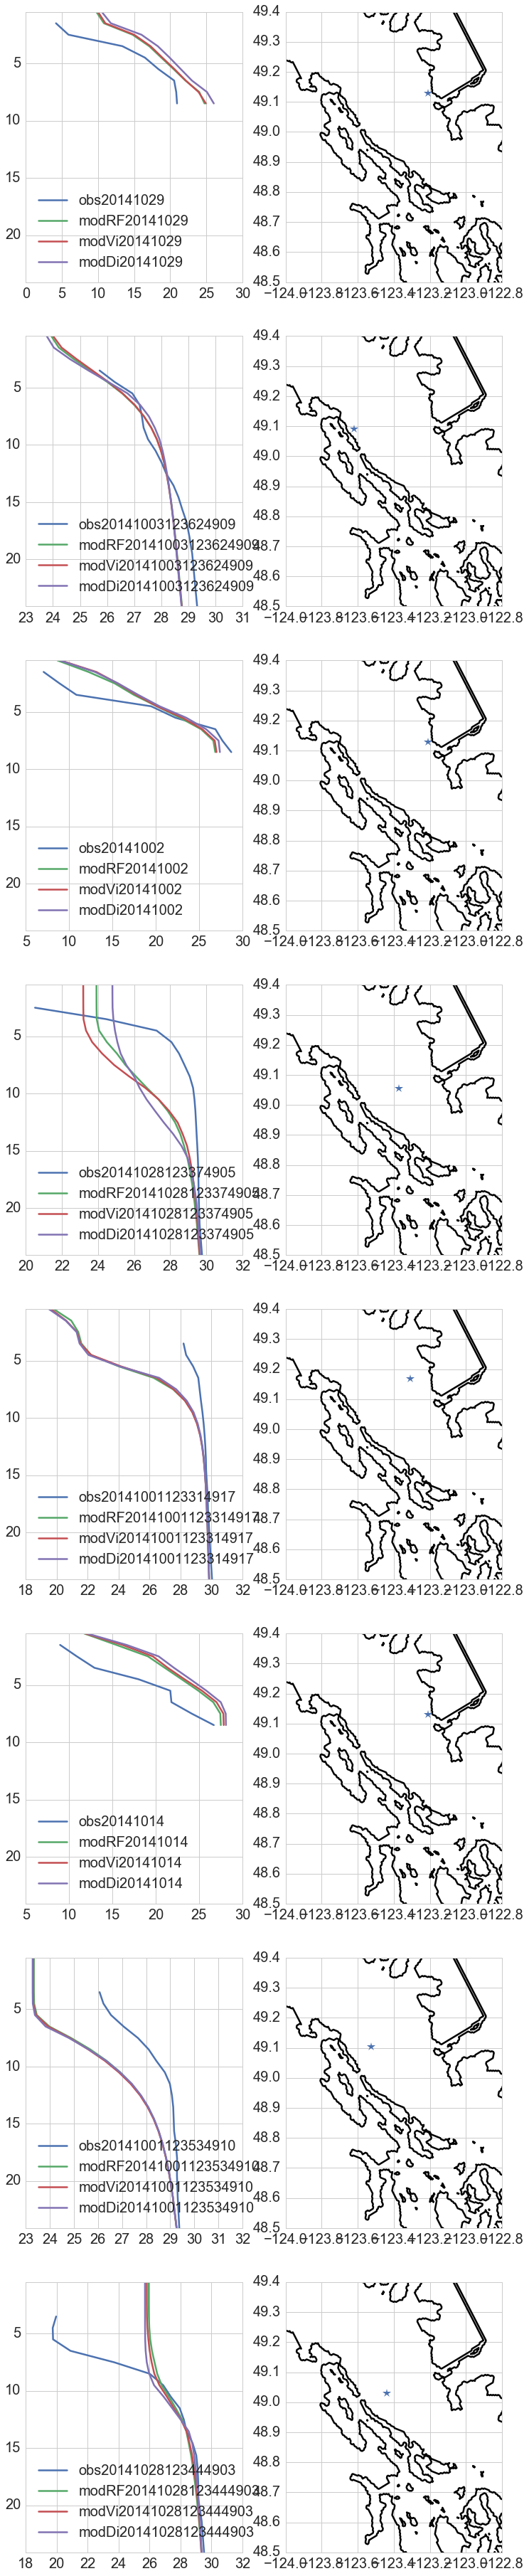

In [32]:
fig, axs = plt.subplots(8,2,figsize = (12,64))
for i,num in zip(obs_values.keys(),np.arange(8)):
    ax = axs[num,0]
    ax.plot(obs_values[i],dep,label = 'obs'+str(i))
    ax.plot(mod_values[i],dep,label = 'modRF'+str(i))
    ax.plot(mod_values_vi[i],dep,label = 'modVi'+str(i))
    ax.plot(mod_values_di[i],dep,label = 'modDi'+str(i))
    ax.set_ylim([dep[20],dep[0]])
    ax.legend(loc = 'best')
    
    ax = axs[num,1]
    if i == 20141002 or i ==20141014 or i ==20141029:
        ax.plot(-123.2119,49.1292,'*',markersize = 12)
    else:
        ax.plot(data_m[data_m['ID'] == str(i)].Longitude.values, \
           data_m[data_m['ID'] == str(i)].Latitude.values,'*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])   

* Lower diffusivity case does not make surface salinity fresher, why?? Intermediate fresher in one of it.